In [1]:
using Revise
includet("../cluster_env/runs/rg_unstructured//job.jl")

In [2]:
using CairoMakie
using GLMakie
CairoMakie.activate!()
# display(GLMakie.Screen(), f.figure)

[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]


# Setup

In [4]:
summerge(data) = reduce((a, b)->mergewith(+, a, b), data)
getratio(cs, dict) = sum(c->get(dict, c, 0), cs) / sum(values(dict))
getratio(c::Number, dict) = getratio((c,), dict)

getratio (generic function with 2 methods)

In [5]:
function extract_good_only(data, good_codes=(101, 1, 2))
    gd = [rebuild(get.(data, c, 0); name=(@sprintf "Code %d" c)) for c in good_codes]
    good_total = rebuild(sum(gd); name="Total good codes")

    (good_total ,gd...)
end
# gd, g101, g1, g2 = extract_good_only(data)

extract_good_only (generic function with 2 methods)

# Load data

### run3_N10

In [15]:
# data = load_object("../cluster_env/runs/rg_unstructured/run1_shorter.jld2");
data = load_object("../cluster_env/runs/rg_unstructured/run3_N10_testing.jld2");
data = data[si=2:End,sr=2:End,sb=2:End] # skip 0 sparsities
data

┌ 5×5×4×4×4×4 DimArray{Dict{Int64, Int64}, 6} ┐
├─────────────────────────────────────────────┴────────────────────────── dims ┐
  ↓ m Sampled{Float64} [0.0625, …, 4.0] ForwardOrdered Irregular Points,
  → c Sampled{Float64} [0.25, …, 64.0] ForwardOrdered Irregular Points,
  ↗ l Sampled{Float64} 0.0:0.3333333333333333:1.0 ForwardOrdered Regular Points,
  ⬔ si Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points,
  ◩ sr Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points,
  ⬒ sb Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points
└──────────────────────────────────────────────────────────────────────────────┘
[:, :, 1, 1, 1, 1]
 ↓ →       0.25                         …  64.0
 0.0625     Dict(11=>1, 1=>98, 101=>1)       Dict(1=>100)
 0.176777   Dict(-11=>1, 11=>1, 1=>98)       Dict(-11=>1, 1=>99)
 0.5        Dict(1=>96, 101=>4)              Dict(1=>100)
 1.41421    Dict(1=>65, 101=>35)             Dict(1=>100)
 4.0        Dict(101=>100)              …    Dict(11

In [16]:
length(data)

6400

### run3_N5

In [34]:
data = load_object("../cluster_env/runs/rg_unstructured/run3_N5.jld2");
@show length(data)
data

length(data) = 6400


┌ 5×5×4×4×4×4 DimArray{Dict{Int64, Int64}, 6} ┐
├─────────────────────────────────────────────┴────────────────────────── dims ┐
  ↓ m Sampled{Float64} [0.0625, …, 4.0] ForwardOrdered Irregular Points,
  → c Sampled{Float64} [0.25, …, 64.0] ForwardOrdered Irregular Points,
  ↗ l Sampled{Float64} 0.0:0.3333333333333333:1.0 ForwardOrdered Regular Points,
  ⬔ si Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points,
  ◩ sr Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points,
  ⬒ sb Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points
└──────────────────────────────────────────────────────────────────────────────┘
[:, :, 1, 1, 1, 1]
 ↓ →       0.25                   …  64.0
 0.0625     Dict(1=>58, 101=>42)       Dict(1=>81, 101=>19)
 0.176777   Dict(1=>65, 101=>35)       Dict(11=>1, 1=>58, 101=>41)
 0.5        Dict(1=>53, 101=>47)       Dict(1=>76, 101=>24)
 1.41421    Dict(1=>29, 101=>71)       Dict(1=>60, 101=>40)
 4.0        Dict(11=>1, 101=>99)  …    Dict(1=>63,

### run4_N5_lowerDs

In [58]:
data = load_object("../cluster_env/runs/rg_unstructured/run4_N5_lowerDs.jld2");
@show length(data)
data

length(data) = 6400


┌ 5×5×4×4×4×4 DimArray{Dict{Int64, Int64}, 6} ┐
├─────────────────────────────────────────────┴────────────────────────── dims ┐
  ↓ m Sampled{Float64} [0.0625, …, 4.0] ForwardOrdered Irregular Points,
  → c Sampled{Float64} [0.25, …, 64.0] ForwardOrdered Irregular Points,
  ↗ l Sampled{Float64} 0.0:0.3333333333333333:1.0 ForwardOrdered Regular Points,
  ⬔ si Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points,
  ◩ sr Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points,
  ⬒ sb Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points
└──────────────────────────────────────────────────────────────────────────────┘
[:, :, 1, 1, 1, 1]
 ↓ →       0.25           1.0            …  16.0            64.0
 0.0625     Dict(1=>1)     Dict(101=>1)       Dict(1=>1)      Dict(101=>1)
 0.176777   Dict(1=>1)     Dict(1=>1)         Dict(1=>1)      Dict(1=>1)
 0.5        Dict(101=>1)   Dict(101=>1)       Dict(1=>1)      Dict(101=>1)
 1.41421    Dict(101=>1)   Dict(1=>1)         Dict(

In [59]:
data[1]

Dict{Int64, Int64} with 1 entry:
  1 => 1

In [60]:
map(x->sum(values(x)), data)

┌ 5×5×4×4×4×4 DimArray{Int64, 6} ┐
├────────────────────────────────┴─────────────────────────────────────── dims ┐
  ↓ m Sampled{Float64} [0.0625, …, 4.0] ForwardOrdered Irregular Points,
  → c Sampled{Float64} [0.25, …, 64.0] ForwardOrdered Irregular Points,
  ↗ l Sampled{Float64} 0.0:0.3333333333333333:1.0 ForwardOrdered Regular Points,
  ⬔ si Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points,
  ◩ sr Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points,
  ⬒ sb Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points
└──────────────────────────────────────────────────────────────────────────────┘
[:, :, 1, 1, 1, 1]
 ↓ →       0.25  1.0  4.0  16.0  64.0
 0.0625    1     1    1     1     1
 0.176777  1     1    1     1     1
 0.5       1     1    1     1     1
 1.41421   1     1    1     1     1
 4.0       1     1    1     1     1

### run4_N20

In [56]:
data = load_object("../cluster_env/runs/rg_unstructured/run4_N20.jld2");
@show length(data)
data

length(data) = 6400


┌ 5×5×4×4×4×4 DimArray{Dict{Int64, Int64}, 6} ┐
├─────────────────────────────────────────────┴────────────────────────── dims ┐
  ↓ m Sampled{Float64} [0.0625, …, 4.0] ForwardOrdered Irregular Points,
  → c Sampled{Float64} [0.25, …, 64.0] ForwardOrdered Irregular Points,
  ↗ l Sampled{Float64} 0.0:0.3333333333333333:1.0 ForwardOrdered Regular Points,
  ⬔ si Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points,
  ◩ sr Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points,
  ⬒ sb Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points
└──────────────────────────────────────────────────────────────────────────────┘
[:, :, 1, 1, 1, 1]
 ↓ →       0.25                    …  64.0
 0.0625     Dict(-1=>1, 1=>99)          Dict(-1=>5, 1=>95)
 0.176777   Dict(-2000=>1, 1=>99)       Dict(-1=>1, -2000=>1, 1=>98)
 0.5        Dict(-2000=>1, 1=>99)       Dict(1=>100)
 1.41421    Dict(-2000=>1, 1=>99)       Dict(1=>100)
 4.0        Dict(1=>49, 101=>51)   …    Dict(1=>100)

### first test run

In [13]:
# data = load_object("../cluster_env/runs/rg_unstructured/run1_shorter.jld2");
data

┌ 5×5×4×4×4×4 DimArray{Dict{Int64, Int64}, 6} ┐
├─────────────────────────────────────────────┴────────────────────────── dims ┐
  ↓ m Sampled{Float64} [0.0625, …, 4.0] ForwardOrdered Irregular Points,
  → c Sampled{Float64} [0.25, …, 64.0] ForwardOrdered Irregular Points,
  ↗ l Sampled{Float64} 0.0:0.3333333333333333:1.0 ForwardOrdered Regular Points,
  ⬔ si Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points,
  ◩ sr Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points,
  ⬒ sb Sampled{Float64} 0.25:0.25:1.0 ForwardOrdered Regular Points
└──────────────────────────────────────────────────────────────────────────────┘
[:, :, 1, 1, 1, 1]
 ↓ →       0.25                   …  64.0
 0.0625     Dict(1=>58, 101=>42)       Dict(1=>81, 101=>19)
 0.176777   Dict(1=>65, 101=>35)       Dict(11=>1, 1=>58, 101=>41)
 0.5        Dict(1=>53, 101=>47)       Dict(1=>76, 101=>24)
 1.41421    Dict(1=>29, 101=>71)       Dict(1=>60, 101=>40)
 4.0        Dict(11=>1, 101=>99)  …    Dict(1=>63,

In [61]:
length(data)

6400

# First look

In [35]:
xx = summerge(data)

Dict{Int64, Int64} with 14 entries:
  -11   => 6
  12    => 1
  1     => 509313
  23    => 32
  -1007 => 18
  11    => 86
  -1    => 107
  -2    => 1
  -2000 => 561
  -1004 => 130
  21    => 3
  2     => 4924
  -13   => 1
  101   => 124817

In [40]:
(xx[101] + xx[1] + xx[2]) / sum(values(xx))

0.998521875

## Phase diagrams of good data only

In [37]:
gd, g101, g1, g2 = extract_good_only(data)
gp101, gp1, gp2 = (rebuild(x ./ gd; name=x.name) for x in (g101, g1, g2))
sum(gd)

639054

In [29]:
xx = rebuild(g2 ./ (g1 .+ g2); name="Code 2 / (Code 1 + Code 2)")
for i in eachindex(xx)
    if isnan(xx[i])
        xx[i] = 0.
    end
end
faa = plot_many_dimdata_heatmap_int((xx, gp2, gp1, gp101), :si, :sr)
display(GLMakie.Screen(), faa.figure)

GLMakie.Screen(...)

In [10]:
xx = rebuild(g2 ./ (g1 .+ g2); name="Code 2 / (Code 1 + Code 2)")
for i in eachindex(xx)
    if isnan(xx[i])
        xx[i] = 0.
    end
end
faa = plot_many_dimdata_heatmap_int((xx, gp2, gp1, gp101), :sb, :sr)
GLMakie.closeall()
display(GLMakie.Screen(), faa.figure)

LoadError: UndefVarError: `g2` not defined

In [145]:
xx = gp2 - gp101
rr = maximum(abs, xx)
faa = plot_dimdata_heatmap_int(xx, :si, :sr;
    colorrange=(-rr, rr),
    colormap=:RdBu
)
GLMakie.closeall()
display(GLMakie.Screen(), faa.figure)

GLMakie.Screen(...)

# Archive

## Interactive phase-diagramy maps

In [56]:
xx = getratio.(2, data)
faa = plot_dimdata_heatmap_int(xx, :si, :sr;
    colorrange=(0., maximum(xx))
)
GLMakie.closeall()
display(GLMakie.Screen(), faa.figure)

GLMakie.Screen(...)

## Seeing the proportion of spatial instabilities

In [17]:
mur = getratio.(2, data)
maximum(mur)

0.2

In [18]:
faa = plot_dimdata_heatmap_int(mur, :si, :sr;
    colorrange=(0., maximum(mur))
)
GLMakie.closeall()
display(GLMakie.Screen(), faa.figure)

GLMakie.Screen(...)

In [16]:
faa = plot_dimdata_heatmap_int(mur, :c, :l;
    colorrange=(0., maximum(mur))
)
GLMakie.closeall()
display(GLMakie.Screen(), faa.figure)

GLMakie.Screen(...)

In [289]:
ext = getratio.(Ref((-101, 101)), data)

┌ 3×3×3×3×5×5×5 DimArray{Float64, 7} ┐
├────────────────────────────────────┴──────────────────────────── dims ┐
  ↓ N Sampled{Int64} [4, …, 20] ForwardOrdered Irregular Points,
  → m Sampled{Float64} [0.125, …, 8.0] ForwardOrdered Irregular Points,
  ↗ c Sampled{Float64} [0.125, …, 8.0] ForwardOrdered Irregular Points,
  ⬔ l Sampled{Float64} [0.0, …, 1.0] ForwardOrdered Irregular Points,
  ◩ si Sampled{Float64} 0.0:0.25:1.0 ForwardOrdered Regular Points,
  ⬒ sr Sampled{Float64} 0.0:0.25:1.0 ForwardOrdered Regular Points,
  ⬓ sb Sampled{Float64} 0.0:0.25:1.0 ForwardOrdered Regular Points
└───────────────────────────────────────────────────────────────────────┘
[:, :, 1, 1, 1, 1, 1]
  ↓ →  0.125  1.0   8.0
  4    0.01   0.72  1.0
 10    0.0    0.57  1.0
 20    0.01   0.39  0.98

In [291]:
faa = plot_dimdata_heatmap_int(ext, :si, :sr;
    colorrange=(0., maximum(ext))
)
GLMakie.closeall()
display(GLMakie.Screen(), faa.figure)

GLMakie.Screen(...)

# Running a single system

In [457]:
ps = rsg();

In [449]:
ps = params[1];

## No space solver

In [450]:
# Steady state
u0 = make_u0_smart(ps; u0=:onlyN)
ssp = make_mmicrm_ss_problem(ps, u0)
@time sss = solve(ssp, DynamicSS(QNDF());
    abstol=eps(),
    reltol=eps()
);
maximum(abs, sss.resid)

  4.895337 seconds (199.53 k allocations: 62.847 MiB)


4.877974151403349e-14

In [203]:
ps.m

5-element Vector{Float64}:
 0.48842415968900277
 0.5988771633066353
 0.5003780464483233
 0.0
 0.5678196418856316

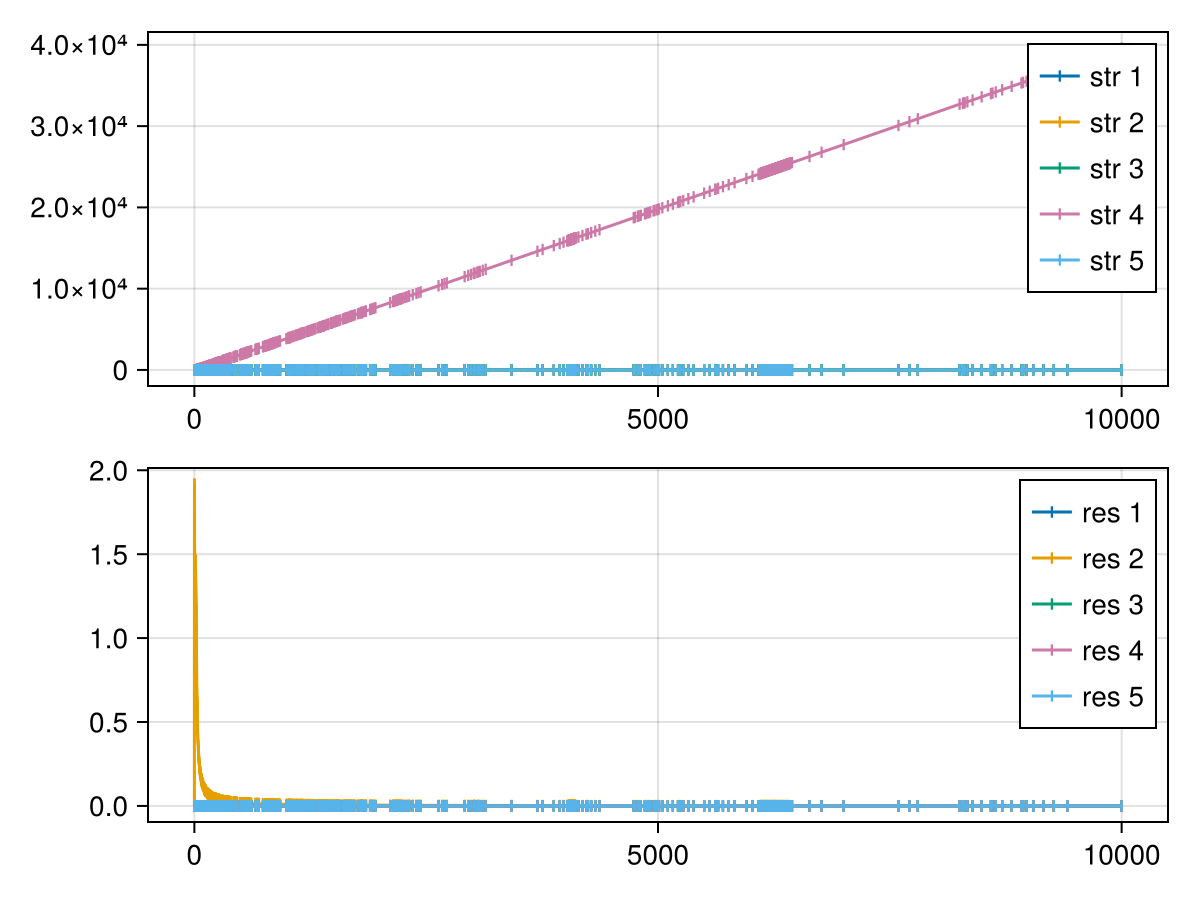

In [196]:
# Fixed time with evolution
u0 = make_u0_smart(ps; u0=:onlyN);
p = make_mmicrm_problem(ps, u0, 10000);
p = remake_guarantee_positive(p)

s = solve(p, QNDF();
    callback=make_timer_callback(60)
)

f = plot_mmicrm_sol(s)
# display(GLMakie.Screen(), f)
f

## Spatial stuff

In [357]:
nssol = s.u[end];
# nssol = sss.u
xx = uninplace(mmicrmfunc!)(nssol, ps)
maxresid = maximum(abs, xx)
@show maxresid;

maxresid = 5.5780684779205136e-15


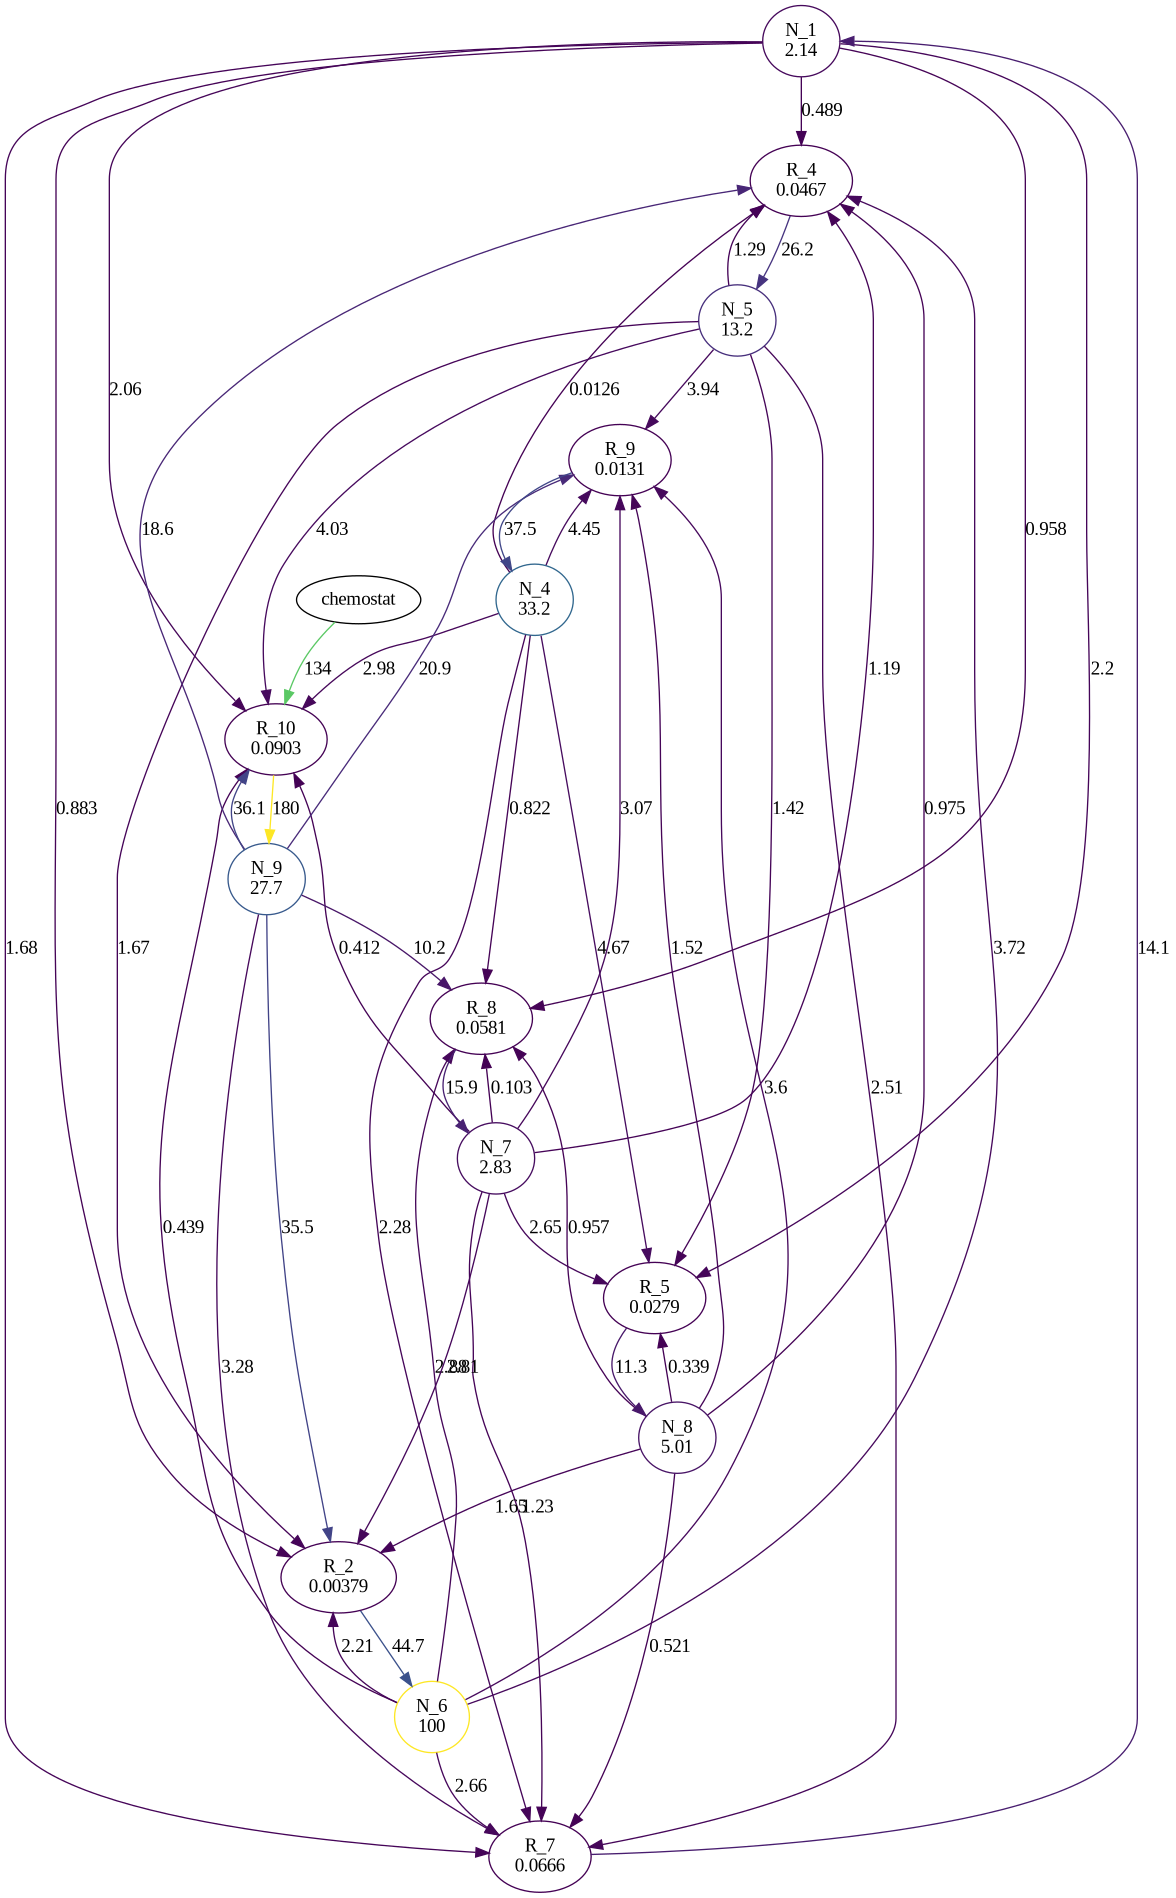

In [358]:
g = diagram_sfss_v3(ps, nssol;
    strain_threshold=1e-10
)

### Linear stability

In [418]:
ks = LinRange(0., 1000., 10000)

Ds = get_Ds(ps)
Ds = vcat(
    fill(1e-8, get_Ns(ps)[1]),
    fill(1e-8, get_Ns(ps)[2])
)
Ds[20] = 10000

lamfunc = linstab_make_k_func(ps, Ds, nssol)
lambdas = lamfunc.(ks);

maximum(x->maximum(real, x), lambdas)

-5.464753751148015e-5

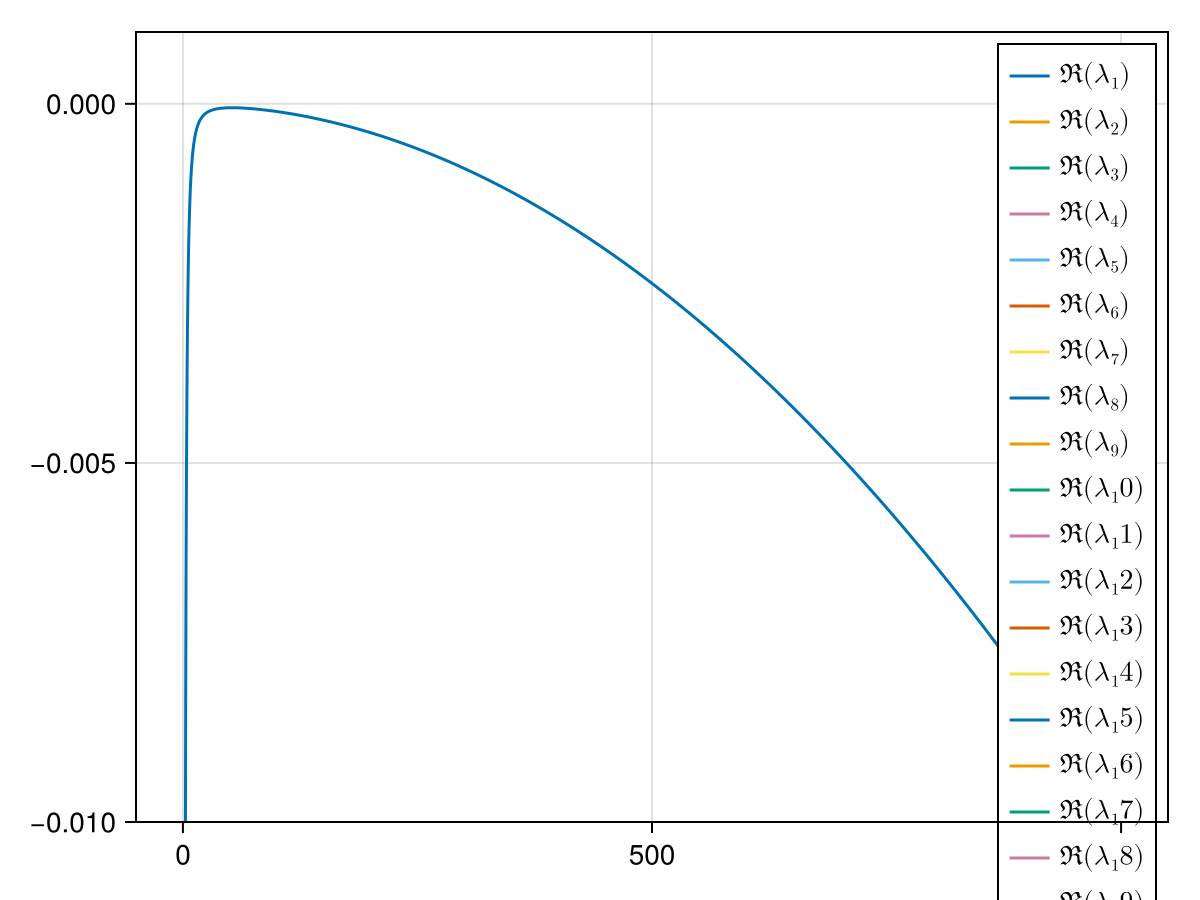

In [419]:
faa = plot_linstab_lambdas(ks, lambdas;
    imthreshold=Inf
)
# display(GLMakie.Screen(), faa.figure)
ylims!(faa.axis, -0.01, 0.001)
# xlims!(faa.axis, 0., 1000)
faa

### 1D spatial

In [349]:
ssize = (1000,)
dx = 0.01

# baseu0 = nssol
baseu0 = make_u0_smart(ps; u0=:onlyN)
su0 = expand_u0_to_size(ssize, baseu0)
su0 = perturb_u0_uniform_prop(get_Ns(ps)..., su0, 0.1, 0.1)


spaceps = change_bsmmicrmparams(ps; space=make_cartesianspace_smart(1;
    dx,
    bcs=Periodic()),
    usenthreads=nthreads()
)
@show spaceps.usenthreads spaceps.mmicrm_params.usenthreads

sp = make_smmicrm_problem(spaceps, su0, 100000);

spaceps.usenthreads = 18
spaceps.mmicrm_params.usenthreads = nothing


In [350]:
@time sps = solve(sp, QNDF());
print_spatial_solution_stats(sps)

  9.385754 seconds (13.18 M allocations: 3.611 GiB, 2.23% gc time, 129.82% compilation time)
Success
nf is 1030
solution has 155 saved states
max resid is 2.55048e-06


┌ Warning: reaching negative values, minimum is -3.34381e-07
└ @ SSMCMain.ModifiedMiCRM ~/UCLOneDrive/Projects/SSMC/src/SSMCMain/src/ModifiedMiCRM/util.jl:10


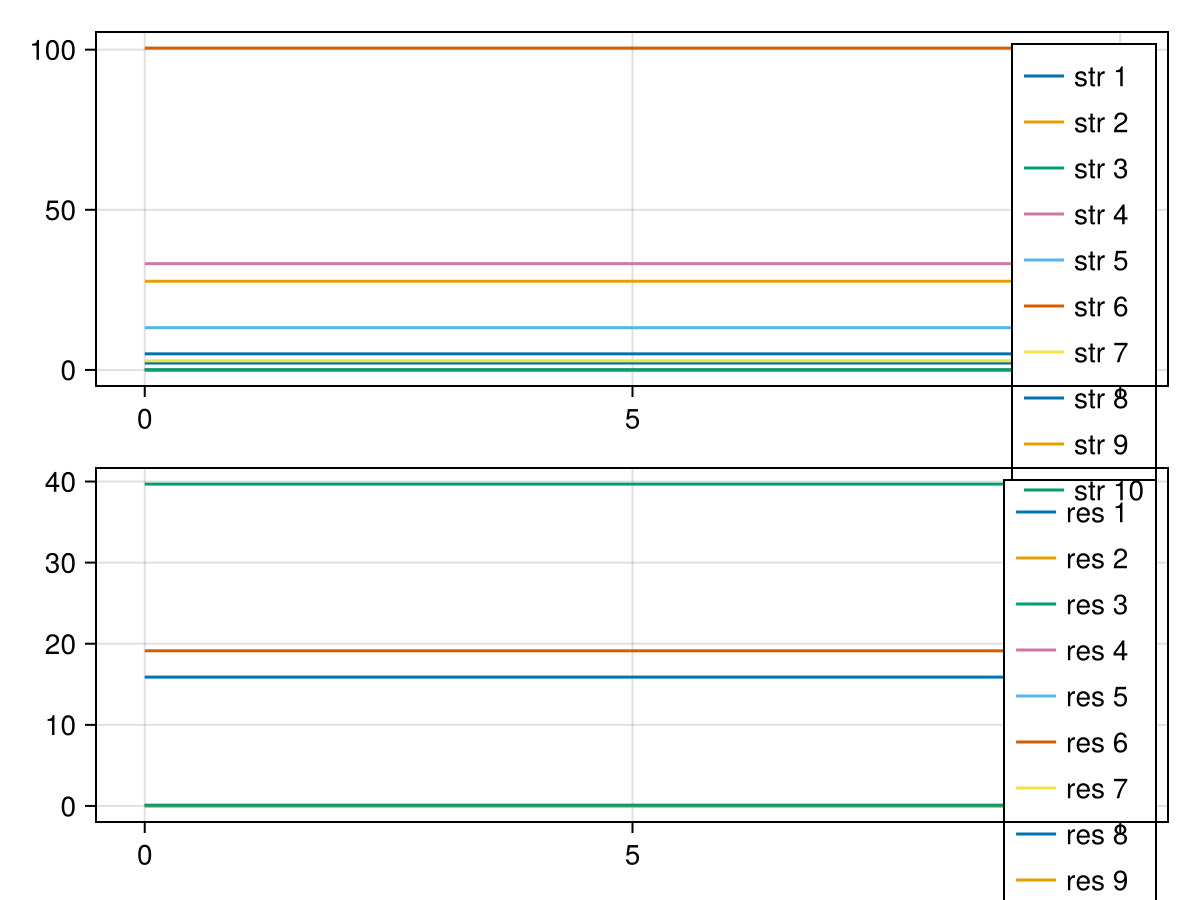

In [352]:
plot_1dsmmicrm_sol_snap(sps.prob.p, sps.u[end])

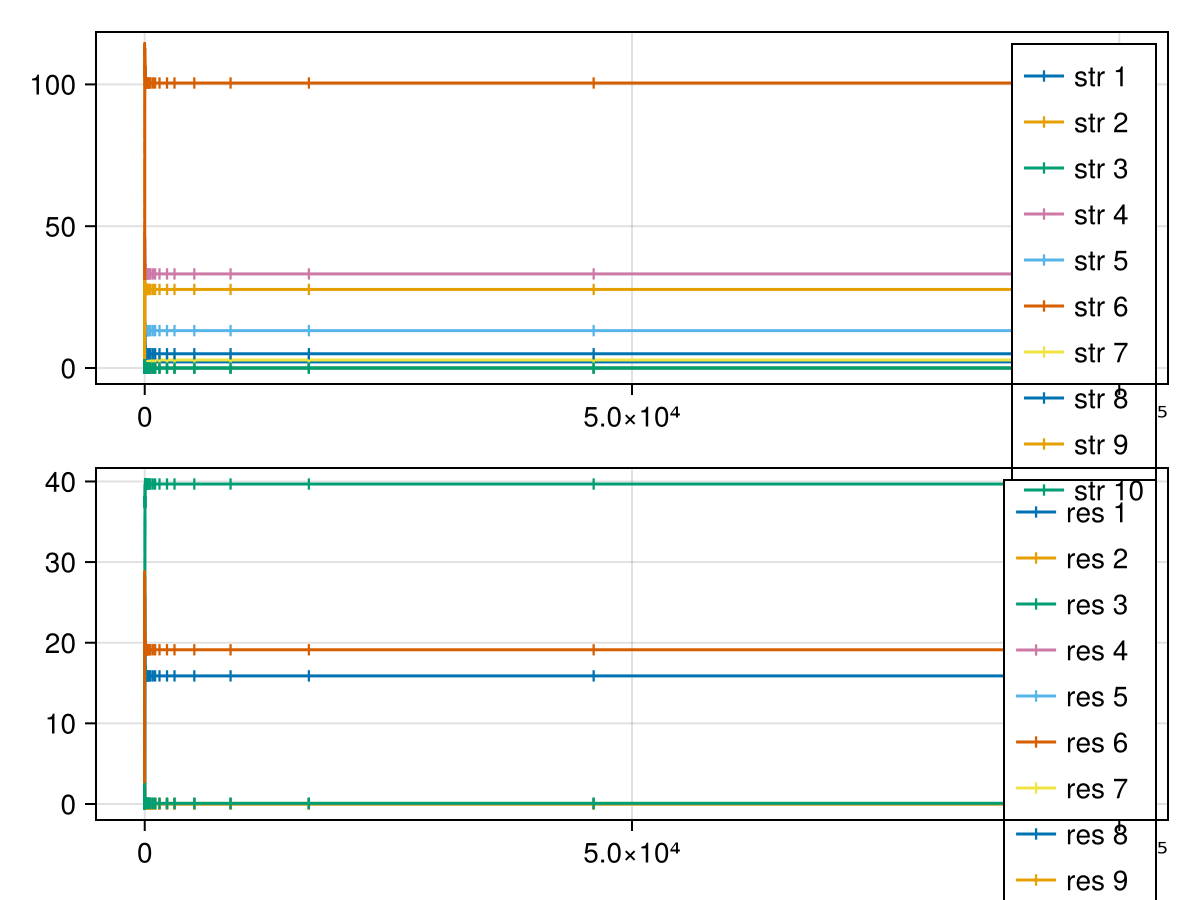

In [353]:
plot_smmicrm_sol_avgs(sps)

# Extras

In [189]:
GC.gc()
empty!(Out)
GC.gc()